<a href="https://colab.research.google.com/github/Musabbirstar/Skill-Morph/blob/main/skill_Morph_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1.1: Data Loading and Exploration**

In [86]:

import numpy as np
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [87]:
df.shape

(1000, 8)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [89]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [90]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [91]:
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [92]:
df.duplicated().sum()

np.int64(0)

In [93]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [94]:
cols = df.select_dtypes(include='object').columns
for col in cols:
    print(f"Unique values in '{col}':")
    display(df[col].unique())

Unique values in 'gender':


array(['female', 'male'], dtype=object)

Unique values in 'race/ethnicity':


array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

Unique values in 'parental level of education':


array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

Unique values in 'lunch':


array(['standard', 'free/reduced'], dtype=object)

Unique values in 'test preparation course':


array(['none', 'completed'], dtype=object)

# **Task 1.2: NumPy Array Operations**

In [95]:
math_scores = df['math score'].values
reading_scores = df['reading score'].values
writing_scores = df['writing score'].values

In [96]:
print(f"Math- Mean: {np.mean(math_scores):.2f}, Median: {np.median(math_scores):.2f}, "
      f"Std: {np.std(math_scores):.2f}, Min: {np.min(math_scores)}, Max: {np.max(math_scores)}")

Math- Mean: 66.09, Median: 66.00, Std: 15.16, Min: 0, Max: 100


In [97]:
print(f"Reading- Mean: {np.mean(reading_scores):.2f}, Median: {np.median(reading_scores):.2f}, "
      f"Std: {np.std(reading_scores):.2f}, Min: {np.min(reading_scores)}, Max: {np.max(reading_scores)}")

Reading- Mean: 69.17, Median: 70.00, Std: 14.59, Min: 17, Max: 100


In [98]:
print(f"Writing- Mean: {np.mean(writing_scores):.2f}, Median: {np.median(writing_scores):.2f}, "
      f"Std: {np.std(writing_scores):.2f}, Min: {np.min(writing_scores)}, Max: {np.max(writing_scores)}")

Writing- Mean: 68.05, Median: 69.00, Std: 15.19, Min: 10, Max: 100


In [99]:
print(f"\nStudents with math > 80: {np.sum(math_scores > 80)}")


Students with math > 80: 176


In [100]:
print(f"Students with any score < 50: {np.sum((math_scores < 50) | (reading_scores < 50) | (writing_scores < 50))}")

Students with any score < 50: 188


In [101]:
print(f"\nOverall average score (all subjects): {(np.mean(np.concatenate([math_scores, reading_scores, writing_scores]))):.2f}")


Overall average score (all subjects): 67.77


# **Task 2.1: Identify and Handle Missing Data**

In [102]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [103]:
print("Invalid Math Scores:", len(df[(df['math score'] < 0) | (df['math score'] > 100)]))
print("Invalid Reading Scores:", len(df[(df['reading score'] < 0) | (df['reading score'] > 100)]))
print("Invalid Writing Scores:", len(df[(df['writing score'] < 0) | (df['writing score'] > 100)]))

Invalid Math Scores: 0
Invalid Reading Scores: 0
Invalid Writing Scores: 0


In [104]:
df.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


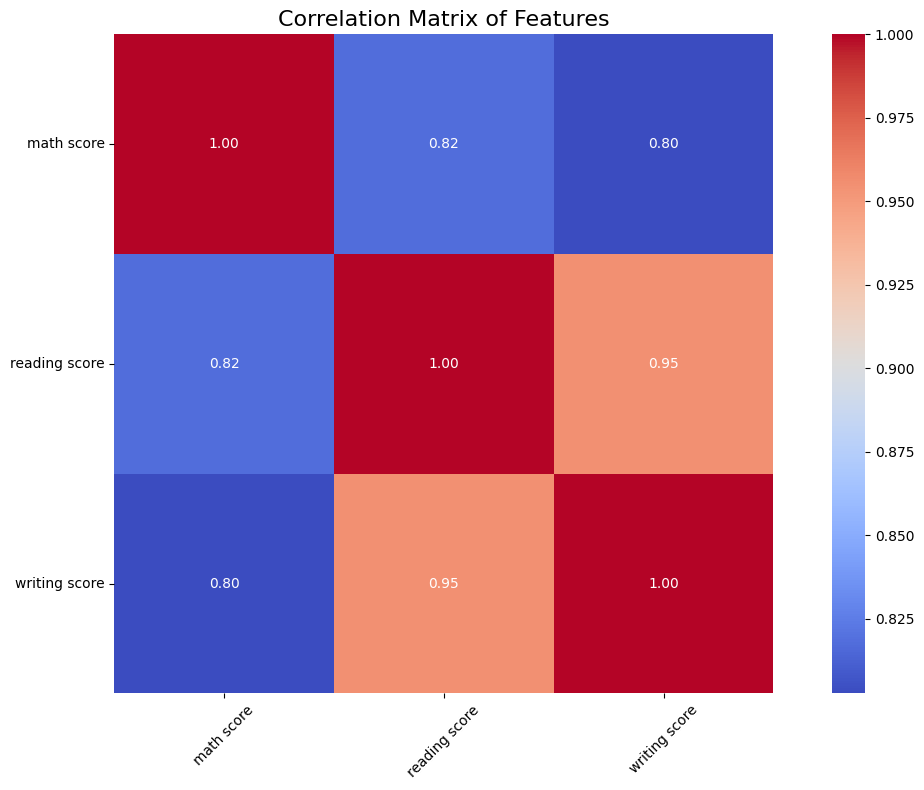

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is your dataframe with features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Task 2.2: Create and Fix Missing Value**

In [106]:
df_practice = df.copy()
df_practice.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [107]:
np.random.seed(42)
missing_math_idx = np.random.choice(df_practice.index, 50, replace=False)
missing_writing_idx = np.random.choice(df_practice.index, 30, replace=False)

df_practice.loc[missing_math_idx, "math score"] = np.nan
df_practice.loc[missing_writing_idx, "writing score"] = np.nan

df_practice.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,50
reading score,0
writing score,30


In [108]:
df_practice["math score"].fillna(df_practice["math score"].median(), inplace=True)
df_practice["writing score"].fillna(df_practice["writing score"].mean(), inplace=True)



/tmp/ipython-input-3203453926.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_practice["math score"].fillna(df_practice["math score"].median(), inplace=True)
/tmp/ipython-input-3203453926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [109]:
df_practice.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


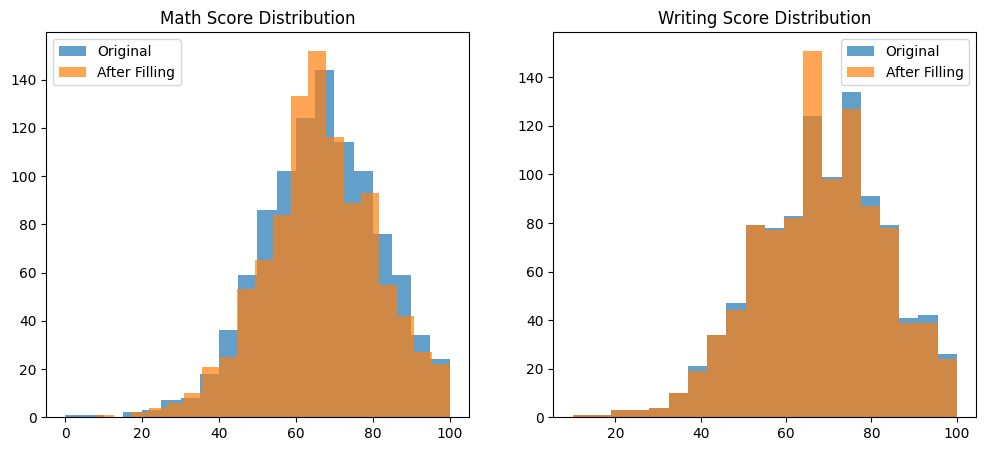

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Math score distribution
axes[0].hist(df["math score"], bins=20, alpha=0.7, label="Original")
axes[0].hist(df_practice["math score"], bins=20, alpha=0.7, label="After Filling")
axes[0].set_title("Math Score Distribution")
axes[0].legend()

# Writing score distribution
axes[1].hist(df["writing score"], bins=20, alpha=0.7, label="Original")
axes[1].hist(df_practice["writing score"], bins=20, alpha=0.7, label="After Filling")
axes[1].set_title("Writing Score Distribution")
axes[1].legend()

plt.show()

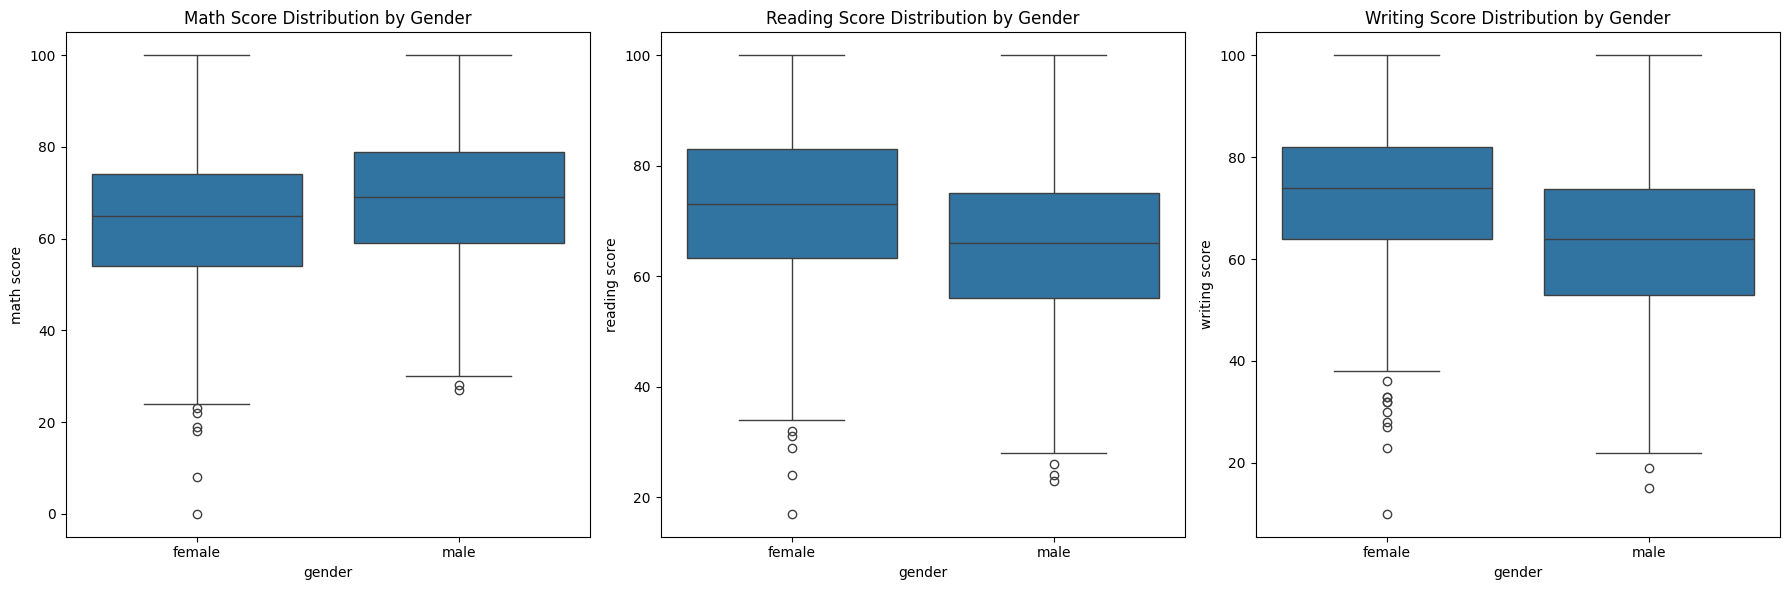

In [111]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='gender', y='math score', data=df, ax=axes[0])
axes[0].set_title('Math Score Distribution by Gender')

sns.boxplot(x='gender', y='reading score', data=df, ax=axes[1])
axes[1].set_title('Reading Score Distribution by Gender')

sns.boxplot(x='gender', y='writing score', data=df, ax=axes[2])
axes[2].set_title('Writing Score Distribution by Gender')

plt.tight_layout()
plt.show()

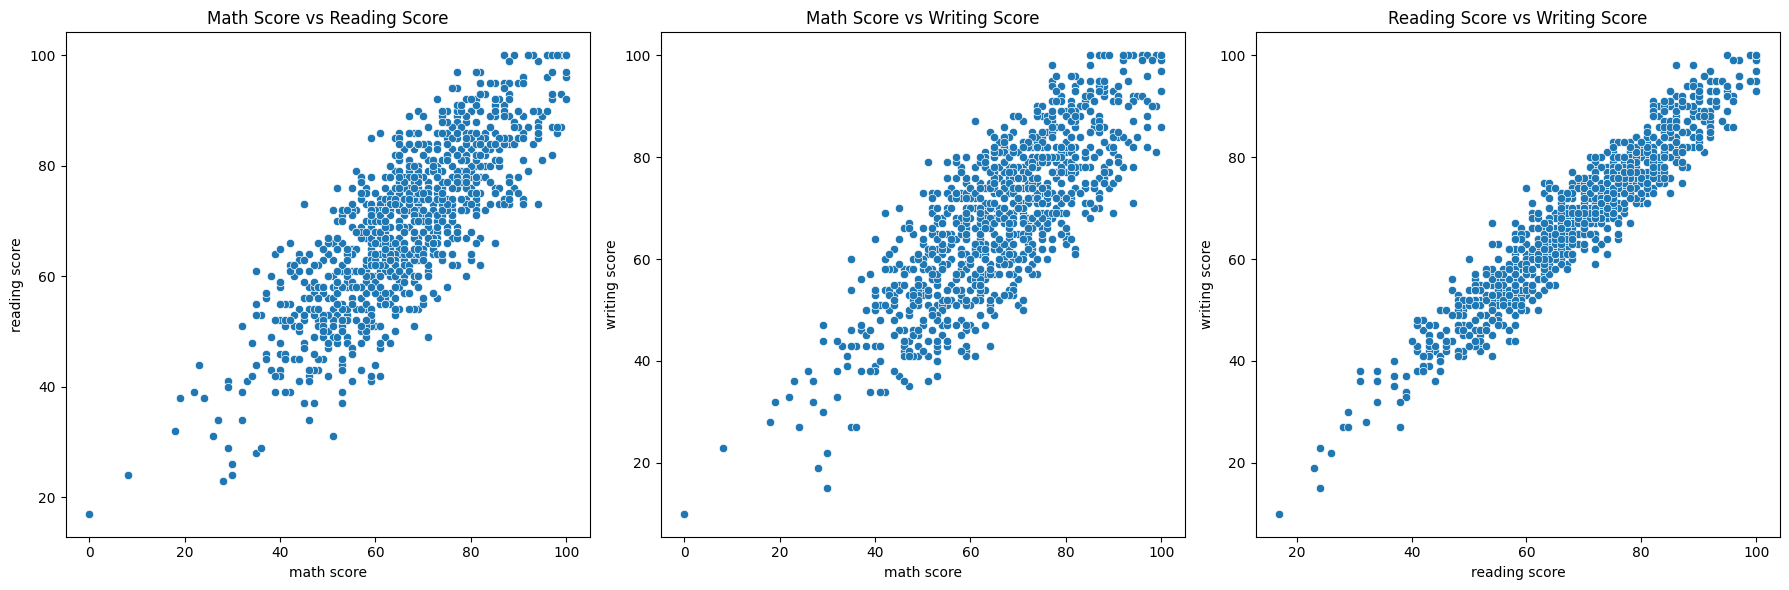

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x='math score', y='reading score', data=df, ax=axes[0])
axes[0].set_title('Math Score vs Reading Score')

sns.scatterplot(x='math score', y='writing score', data=df, ax=axes[1])
axes[1].set_title('Math Score vs Writing Score')

sns.scatterplot(x='reading score', y='writing score', data=df, ax=axes[2])
axes[2].set_title('Reading Score vs Writing Score')

plt.tight_layout()
plt.show()

# **Task 3.1:Answer Simple Questions About Student Performance**

In [113]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [114]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [115]:
df.shape

(1000, 8)

In [116]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [117]:
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# **Task 3.2: Basic Groupby Analysis**

In [119]:
gender_group = df.groupby("gender").agg(
    avg_math=("math score", "mean"),
    avg_reading=("reading score", "mean"),
    avg_writing=("writing score", "mean"),
    student_count=("gender", "count")
)
print("Group by Gender:\n", gender_group, "\n")

Group by Gender:
          avg_math  avg_reading  avg_writing  student_count
gender                                                    
female  63.633205    72.608108    72.467181            518
male    68.728216    65.473029    63.311203            482 



In [120]:
testprep_group = df.groupby("test preparation course").agg(
    avg_math=("math score", "mean"),
    avg_reading=("reading score", "mean"),
    avg_writing=("writing score", "mean")
)
print("Group by Test Preparation Course:\n", testprep_group, "\n")

Group by Test Preparation Course:
                           avg_math  avg_reading  avg_writing
test preparation course                                     
completed                69.695531    73.893855    74.418994
none                     64.077882    66.534268    64.504673 



In [121]:
improvement = testprep_group.loc["completed"] - testprep_group.loc["none"]
print(improvement)
print("Subject benefiting most:", improvement.idxmax(), "\n")

avg_math       5.617649
avg_reading    7.359587
avg_writing    9.914322
dtype: float64
Subject benefiting most: avg_writing 



In [122]:
parent_edu_group = df.groupby("parental level of education")["math score"].mean().sort_values(ascending=False)
print(parent_edu_group)

lunch_group = df.groupby("lunch").agg(
    avg_math=("math score", "mean"),
    avg_reading=("reading score", "mean"),
    avg_writing=("writing score", "mean"),
    student_count=("lunch", "count")
)
print("Group by Lunch Type:\n", lunch_group, "\n")

parental level of education
master's degree       69.745763
bachelor's degree     69.389831
associate's degree    67.882883
some college          67.128319
some high school      63.497207
high school           62.137755
Name: math score, dtype: float64
Group by Lunch Type:
                avg_math  avg_reading  avg_writing  student_count
lunch                                                           
free/reduced  58.921127    64.653521    63.022535            355
standard      70.034109    71.654264    70.823256            645 



#Task 3.3: Use your data analysis skills to answer these easy questions:

In [123]:
grp = df.groupby("gender")["math score"].mean()
diff = grp["male"] - grp["female"]
print("Average Math Score by Gender:\n", grp, "\n")
print(f"Difference (Male - Female): {diff:.2f}\n")

Average Math Score by Gender:
 gender
female    63.633205
male      68.728216
Name: math score, dtype: float64 

Difference (Male - Female): 5.10



In [124]:
subject_avgs = {
    "Math": df["math score"].mean(),
    "Reading": df["reading score"].mean(),
    "Writing": df["writing score"].mean()
}
subject_avgs = pd.Series(subject_avgs).sort_values(ascending=False)
print("Average Scores by Subject:\n",subject_avgs, "\n")
print("Best Performing Subject:", subject_avgs.idxmax(), "\n")

Average Scores by Subject:
 Reading    69.169
Writing    68.054
Math       66.089
dtype: float64 

Best Performing Subject: Reading 



In [125]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
total = df.groupby("parental level of education")["total score"].mean().sort_values(ascending=False)
print("Average Total Score by Parental Education Level:\n", total, "\n")
print("Highest Student Performance from:", total.idxmax())

Average Total Score by Parental Education Level:
 parental level of education
master's degree       220.796610
bachelor's degree     215.771186
associate's degree    208.707207
some college          205.429204
some high school      195.324022
high school           189.290816
Name: total score, dtype: float64 

Highest Student Performance from: master's degree
